In [1]:
import numpy as np

In [2]:
words = open('names.txt', 'r').read().splitlines()
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [3]:
len(words)

32033

In [4]:
min(len(w) for w in words)

2

In [5]:
max(len(w) for w in words)

15

# bigram language model

* In a bigram model, we always work with two characters at a time.
* We only look at one character and try to predict the next character in the sequence.
* Although we may have a lot of information, we are always just looking at the previous character to predict the next one, making this a very simple and weak language model."

In [6]:
for w in words[:1]:
    for ch1, ch2 in zip (w, w[1:]):
        print(ch1,ch2)

e m
m m
m a


In [7]:
w

'emma'

In [8]:
w[1:]

'mma'

In [9]:
for w in words[:3]:
    chs = ['<S>'] + list(w) + ['<E>'] # so in this way we can detect the most of start and end char
    for ch1, ch2 in zip (chs, chs[1:]):
        print(ch1,ch2)

<S> e
e m
m m
m a
a <E>
<S> o
o l
l i
i v
v i
i a
a <E>
<S> a
a v
v a
a <E>


* we are gonna count how often any one of these combinations occurs in the training set

In [10]:
b = {}
for w in words[:3]:
    chs = ['<S>'] + list(w) + ['<E>'] # so in this way we can detect the mot of start and end char
    for ch1, ch2 in zip (chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1
        print(ch1,ch2)

<S> e
e m
m m
m a
a <E>
<S> o
o l
l i
i v
v i
i a
a <E>
<S> a
a v
v a
a <E>


In [11]:
b

{('<S>', 'e'): 1,
 ('e', 'm'): 1,
 ('m', 'm'): 1,
 ('m', 'a'): 1,
 ('a', '<E>'): 3,
 ('<S>', 'o'): 1,
 ('o', 'l'): 1,
 ('l', 'i'): 1,
 ('i', 'v'): 1,
 ('v', 'i'): 1,
 ('i', 'a'): 1,
 ('<S>', 'a'): 1,
 ('a', 'v'): 1,
 ('v', 'a'): 1}

* In this point we can figure out a has a potential being last char. (('a', '< E >'): 3,)
* now lets check on all words

In [12]:
b = {}
for w in words:
    chs = ['<S>'] + list(w) + ['<E>'] # so in this way we can detect the mot of start and end chac
    for ch1, ch2 in zip (chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1


In [13]:
b

{('<S>', 'e'): 1531,
 ('e', 'm'): 769,
 ('m', 'm'): 168,
 ('m', 'a'): 2590,
 ('a', '<E>'): 6640,
 ('<S>', 'o'): 394,
 ('o', 'l'): 619,
 ('l', 'i'): 2480,
 ('i', 'v'): 269,
 ('v', 'i'): 911,
 ('i', 'a'): 2445,
 ('<S>', 'a'): 4410,
 ('a', 'v'): 834,
 ('v', 'a'): 642,
 ('<S>', 'i'): 591,
 ('i', 's'): 1316,
 ('s', 'a'): 1201,
 ('a', 'b'): 541,
 ('b', 'e'): 655,
 ('e', 'l'): 3248,
 ('l', 'l'): 1345,
 ('l', 'a'): 2623,
 ('<S>', 's'): 2055,
 ('s', 'o'): 531,
 ('o', 'p'): 95,
 ('p', 'h'): 204,
 ('h', 'i'): 729,
 ('<S>', 'c'): 1542,
 ('c', 'h'): 664,
 ('h', 'a'): 2244,
 ('a', 'r'): 3264,
 ('r', 'l'): 413,
 ('l', 'o'): 692,
 ('o', 't'): 118,
 ('t', 't'): 374,
 ('t', 'e'): 716,
 ('e', '<E>'): 3983,
 ('<S>', 'm'): 2538,
 ('m', 'i'): 1256,
 ('a', 'm'): 1634,
 ('m', 'e'): 818,
 ('<S>', 'h'): 874,
 ('r', 'p'): 14,
 ('p', 'e'): 197,
 ('e', 'r'): 1958,
 ('r', '<E>'): 1377,
 ('e', 'v'): 463,
 ('v', 'e'): 568,
 ('l', 'y'): 1588,
 ('y', 'n'): 1826,
 ('n', '<E>'): 6763,
 ('b', 'i'): 217,
 ('i', 'g'): 428,


In [14]:
sorted(b.items(), key = lambda kv: -kv[1]) # lets check common ones, -kv[1]-> 1 means count number

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

* we're gonna store this information in 3d array
* rows = first chc, second = second chc

In [15]:
import torch

/opt/anaconda3/envs/torch_base/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [16]:
a = torch.zeros((3,5), dtype = torch.int32) # 3x5 array
a

tensor([[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]], dtype=torch.int32)

In [17]:
a.dtype

torch.int32

* Tensors allow us to manipulate individual entries efficiently.

In [18]:
a[1,3] = 2

In [19]:
a

tensor([[0, 0, 0, 0, 0],
        [0, 0, 0, 2, 0],
        [0, 0, 0, 0, 0]], dtype=torch.int32)

In [20]:
N = torch.zeros((28,28), dtype = torch.int32) # 26 letter and 2 mark sign


In [21]:

for w in words:
    chs = ['<S>'] + list(w) + ['<E>'] # so in this way we can detect the most of repeat start and end char
    for ch1, ch2 in zip (chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1

* now we need the lookup table from char to int

In [22]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i for i,s in enumerate(chars)} # string to integer (stoi)
stoi['<S>'] = 26 # we need to add two mark manually 
stoi['<E>'] = 27
stoi

{'a': 0,
 'b': 1,
 'c': 2,
 'd': 3,
 'e': 4,
 'f': 5,
 'g': 6,
 'h': 7,
 'i': 8,
 'j': 9,
 'k': 10,
 'l': 11,
 'm': 12,
 'n': 13,
 'o': 14,
 'p': 15,
 'q': 16,
 'r': 17,
 's': 18,
 't': 19,
 'u': 20,
 'v': 21,
 'w': 22,
 'x': 23,
 'y': 24,
 'z': 25,
 '<S>': 26,
 '<E>': 27}

In [23]:
for w in words:
    chs = ['<S>'] + list(w) + ['<E>'] 
    for ch1, ch2 in zip (chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1,ix2] +=1

N


tensor([[ 556,  541,  470, 1042,  692,  134,  168, 2332, 1650,  175,  568, 2528,
         1634, 5438,   63,   82,   60, 3264, 1118,  687,  381,  834,  161,  182,
         2050,  435,    0, 6640],
        [ 321,   38,    1,   65,  655,    0,    0,   41,  217,    1,    0,  103,
            0,    4,  105,    0,    0,  842,    8,    2,   45,    0,    0,    0,
           83,    0,    0,  114],
        [ 815,    0,   42,    1,  551,    0,    2,  664,  271,    3,  316,  116,
            0,    0,  380,    1,   11,   76,    5,   35,   35,    0,    0,    3,
          104,    4,    0,   97],
        [1303,    1,    3,  149, 1283,    5,   25,  118,  674,    9,    3,   60,
           30,   31,  378,    0,    1,  424,   29,    4,   92,   17,   23,    0,
          317,    1,    0,  516],
        [ 679,  121,  153,  384, 1271,   82,  125,  152,  818,   55,  178, 3248,
          769, 2675,  269,   83,   14, 1958,  861,  580,   69,  463,   50,  132,
         1070,  181,    0, 3983],
        [ 242,    0,

* Lets try to visualize nicer

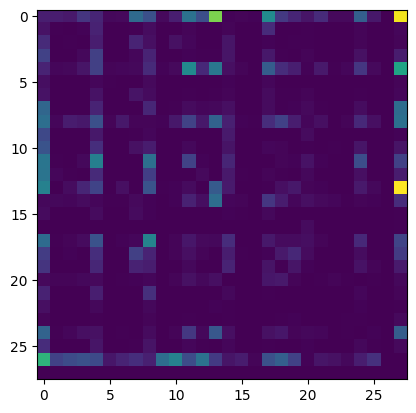

In [24]:
import matplotlib.pyplot as plt
plt.imshow(N)

* Still looking ugly...
* First off all we are going to need to invert stoi to reverse dictionary (stoi -> itos)

In [25]:
itos = {i:s for s,i in stoi.items()}
itos

{0: 'a',
 1: 'b',
 2: 'c',
 3: 'd',
 4: 'e',
 5: 'f',
 6: 'g',
 7: 'h',
 8: 'i',
 9: 'j',
 10: 'k',
 11: 'l',
 12: 'm',
 13: 'n',
 14: 'o',
 15: 'p',
 16: 'q',
 17: 'r',
 18: 's',
 19: 't',
 20: 'u',
 21: 'v',
 22: 'w',
 23: 'x',
 24: 'y',
 25: 'z',
 26: '<S>',
 27: '<E>'}

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

* we have a some problem on unique char in plot lets fix it

In [27]:
N = torch.zeros((27, 27), dtype=torch.int32)

In [28]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [29]:
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    N[ix1, ix2] += 1

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

In [31]:
N[0]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [32]:
p = N[0].float() # probabilty
p = p/p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

* Now p giving us the probabilty any single char to be first char of a word

In [33]:
g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3, generator =g)
p = p /p.sum()
p

tensor([0.6064, 0.3033, 0.0903])

* https://pytorch.org/docs/stable/generated/torch.multinomial.html

In [34]:
torch.multinomial(p, num_samples=20, replacement=True,generator =g)
# like this method we are always getting deterministic result

tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1])

In [35]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True,generator =g).item()
print(ix)
itos[ix]

1


'a'

* now we have a first letter lets check it others in loop

In [36]:
g = torch.Generator().manual_seed(2147483647)
ix = 0
while True:
    p = N[ix].float()
    p = p / p.sum()
    ix = torch.multinomial(p, num_samples=1, replacement=True,generator =g).item()
    print(itos[ix])
    if ix == 0: #thats mean end token
        break

m
o
r
.


* our word is 'mor.'

In [37]:
g = torch.Generator().manual_seed(2147483647)
ix = 0
out = []

while True:

    p = N[ix].float()
    p = p / p.sum()
    ix = torch.multinomial(p, num_samples=1, replacement=True,generator =g).item()
    out.append(itos[ix])
    if ix == 0: #thats mean end token
        break
print(''.join(out))

mor.


* we are always getting same result because of generator lets change it

In [38]:
g = torch.Generator().manual_seed(2147483647)
for i in range(20):

    ix = 0
    out = []

    while True:

        p = N[ix].float()
        p = p / p.sum()
        ix = torch.multinomial(p, num_samples=1, replacement=True,generator =g).item()
        out.append(itos[ix])
        if ix == 0: #thats mean end token
            break
    print(''.join(out))

mor.
axx.
minaymoryles.
kondlaisah.
anchshizarie.
odaren.
iaddash.
h.
jhinatien.
egushl.
h.
br.
a.
jayn.
ilemannariaenien.
be.
f.
akiinela.
trttanakeroruceyaaxatona.
lamoynayrkiedengin.


* Oops. These outputs don't look good (for example, single letters like 'h' as words). The reason is that our model sometimes predicts 'h' as the first letter, but 'h' is not often used as a first character.

In [39]:
g = torch.Generator().manual_seed(2147483647)
for i in range(20):

    ix = 0
    out = []

    while True:

        p = N[ix].float()
        p = p / p.sum()
        ix = torch.multinomial(p, num_samples=1, replacement=True,generator =g).item()
        out.append(itos[ix])
        if ix == 0: #thats mean end token
            break
    print(''.join(out))

mor.
axx.
minaymoryles.
kondlaisah.
anchshizarie.
odaren.
iaddash.
h.
jhinatien.
egushl.
h.
br.
a.
jayn.
ilemannariaenien.
be.
f.
akiinela.
trttanakeroruceyaaxatona.
lamoynayrkiedengin.


In [40]:
g = torch.Generator().manual_seed(2147483647)
for i in range(20):

    ix = 0
    out = []

    while True:

        # p = N[ix].float()
        # p = p / p.sum()
        p = torch.ones(27) /27
        ix = torch.multinomial(p, num_samples=1, replacement=True,generator =g).item()
        out.append(itos[ix])
        if ix == 0: #thats mean end token
            break
    print(''.join(out))

qvsaayxbqrqmyqwuznivanukotdjvdhd.
qnoymtzduqkatdetkpfjdgigvlejfkrsqlwnirghhzwlu.
idcx.
cekmzucjnjoeovjvrggqrjr.
cfbhabkslpokc.
xtxwbpmknuusxdgzfexhwqpldpdnwzvkyxsqjforqqpfxstwkfoufhvwfhmsuyyotvcvvqpfcbydjcouhkajkhqnnpqmmllaordqy.
gszpw.
zlgijinangzzuulsyvqrufuawavsdbnwvlmrypvgrsfgpshgnmwafqmsjdvbhngvoiigxhkwdltrdkwnagzyknqv.
lfstdqigvncdoidetsukgdp.
cfpjsxeqjcsmjwguzes.
woflfjxflylgbegpjdpovdtw.
dlzysqtrbhxhcdneiuum.
xtyslfbmaboaanyjpojuujflcsaucqcgtjmlzqtbaisvxrtgupkppigxudejdzsroqeigovuxmvt.
jlxfolkozci.
tkhdivkdifaxcevlpktkwwvuxlymtwylgpzauwdvxfvbooflddphmjeomjgjcqeqwt.
.
wlxclcjbm.
quuyijtnzmycshclormjyrerqslomdrlbuwqnlmitbrmqhtbdwbyvlsmwnborwcdhjotezwnsxuvffvinrmedelubhdfgtavxqfgmnyqrygyevxaapbjtnwfnwewqxerdytttvfo.
iauarz.
tynoqkyp.


* Now we have a uniform distribution, so everything is equal. Our outputs are coming from an untrained model (where every character has the same probability), and they are garbage.

* first of all we will define new P because the old version of P in our model is not working efficient

In [41]:
P = N.float()
# P /P.sum() # 

In [42]:
P.sum() # p.sum is a huge number we have to find new way

tensor(228146.)

In [43]:
P.sum(0, keepdim=True) 

tensor([[32033., 33885.,  2645.,  3532.,  5496., 20423.,   905.,  1927.,  7616.,
         17701.,  2900.,  5040., 13958.,  6642., 18327.,  7934.,  1026.,   272.,
         12700.,  8106.,  5570.,  3135.,  2573.,   929.,   697.,  9776.,  2398.]])

In [44]:
P.sum(0, keepdim=True) .shape

torch.Size([1, 27])

* now we have a sum of row vector not sum of all
* but actually we dont wanna [1,27] dimension we want a another way

In [45]:
P.sum(1, keepdim=True) .shape

torch.Size([27, 1])

In [46]:
P.sum(1, keepdim=True)

tensor([[32033.],
        [33885.],
        [ 2645.],
        [ 3532.],
        [ 5496.],
        [20423.],
        [  905.],
        [ 1927.],
        [ 7616.],
        [17701.],
        [ 2900.],
        [ 5040.],
        [13958.],
        [ 6642.],
        [18327.],
        [ 7934.],
        [ 1026.],
        [  272.],
        [12700.],
        [ 8106.],
        [ 5570.],
        [ 3135.],
        [ 2573.],
        [  929.],
        [  697.],
        [ 9776.],
        [ 2398.]])

In [47]:
P = N.float()
P = P /P.sum(1, keepdim= True) 

* this section contains broadcasting sementics read the article (P = P /P.sum(1, keepdim= True))
* https://pytorch.org/docs/stable/notes/broadcasting.html
* !!!CHECKPOINT

In [48]:
P[0].sum()

tensor(1.)

In [49]:
g = torch.Generator().manual_seed(2147483647)
for i in range(20):

    ix = 0
    out = []

    while True:
        p = P[ix]
        ix = torch.multinomial(p, num_samples=1, replacement=True,generator =g).item()
        out.append(itos[ix])
        if ix == 0: #thats mean end token
            break
    print(''.join(out))

mor.
axx.
minaymoryles.
kondlaisah.
anchshizarie.
odaren.
iaddash.
h.
jhinatien.
egushl.
h.
br.
a.
jayn.
ilemannariaenien.
be.
f.
akiinela.
trttanakeroruceyaaxatona.
lamoynayrkiedengin.


* if we dont use keepdims=True parameter lets check whats gonna  happen.(broadcasting  disable)

In [50]:
P = N.float()
P/=P.sum(1) 

In [51]:
g = torch.Generator().manual_seed(2147483647)
for i in range(20):

    ix = 0
    out = []

    while True:
        p = P[ix]
        ix = torch.multinomial(p, num_samples=1, replacement=True,generator =g).item()
        out.append(itos[ix])
        if ix == 0: #thats mean end token
            break
    print(''.join(out))

prrabuxclssoxxxxzontantorsemrdef.
ppprluzavilavegunjemahekwiffffksslyndomdeyviu.
jadw.
chinzwamikojowivighoumo.
ch.
h.
bismoricaysuwarliovouxigydeygwrophognuzylywttlequssphwttylequghuwelluwyzovofrusredaych.
mphialigrorotopopaqudox.
guzowazlelihmandyzyuppstttugububrrdaowupouxxxsstharrigjowahopph.
uchlewondextowbluthixxahzziotw.
ketthondurceriddrrtnchoachnetyclicophvevydr.
wokiffthizlebelonarowdrubdizzusttelyh.
dkeluwkaxxzuquckabrabryloriuwiffevavarbevingyppe.
htwyqujusiqulexxiemazutrohekowuxxxx.
jowerjoryak.
rigelwidegaxhawiquwixxxxymynprylery.
sthuxowaqugieerhkhaqumbicohowubaxxxffeman.
ppprikurynzaulblouquxxlquwipogtoduwropphucopphtcexeyuququraquwademmphzynoxxxolwhlsoidditaidekubryokengwrquiyduxcaraluruglycquxlteysttxor.
javatz.
swniquxx.


* complately meaningless... Thats why broadcasting is important 
* this extra '1' dimension is necessary 
* one more detail we should use P/=P.sum() because otherwise old school expression is creating a new tensor and its not efficency

* Lets evaluate the quality of this model 

In [52]:
P = N.float()
P = P /P.sum(1, keepdim= True) 

g = torch.Generator().manual_seed(2147483647)
for i in range(5):

    ix = 0
    out = []

    while True:
        p = P[ix]
        ix = torch.multinomial(p, num_samples=1, replacement=True,generator =g).item()
        out.append(itos[ix])
        if ix == 0: #thats mean end token
            break
    print(''.join(out))

mor.
axx.
minaymoryles.
kondlaisah.
anchshizarie.


In [53]:
for w in words[:3]:
    chs = ['.'] + list(w) + ['.'] # so in this way we can detect the most of repeat start and end chac
    for ch1, ch2 in zip (chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        print(f'{ch1}{ch2}:{prob:.4f}')

.e:0.0478
em:0.0377
mm:0.0253
ma:0.3899
a.:0.1960
.o:0.0123
ol:0.0780
li:0.1777
iv:0.0152
vi:0.3541
ia:0.1381
a.:0.1960
.a:0.1377
av:0.0246
va:0.2495
a.:0.1960


* We have 27 possible characters or tokens, and if everything is equally likely, each one has a probability of 0.03 (1/27 = 0.03). So, any probability above 4% means we have learned something useful from these bigrams. If you have a perfect model, these probabilities should be 1 because the model correctly predicts what will come next, especially on the training set.

* how can we summarize these probabilities? -> Likelyhood function
* https://en.wikipedia.org/wiki/Likelihood_function
* Likelihood is the product of these probabilities. When training the model, the likelihood should be as high as possible, indicating a good model.

* for example we have  a 3 probs(a,b,c). 
* * likelihood prob -> a * b* c
* * log likelihood probs -> log(a * b* c) -> log(a) + log(b) + log(c)

In [54]:
log_likelihood = 0.0
for w in words[:3]:
    chs = ['.'] + list(w) + ['.'] # so in this way we can detect the most of repeat start and end chac
    for ch1, ch2 in zip (chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood+= logprob
        print(f'{ch1}{ch2}:{prob:.4f}{logprob:.4f}')
print( f'{log_likelihood=}')

.e:0.0478-3.0408
em:0.0377-3.2793
mm:0.0253-3.6772
ma:0.3899-0.9418
a.:0.1960-1.6299
.o:0.0123-4.3982
ol:0.0780-2.5508
li:0.1777-1.7278
iv:0.0152-4.1867
vi:0.3541-1.0383
ia:0.1381-1.9796
a.:0.1960-1.6299
.a:0.1377-1.9829
av:0.0246-3.7045
va:0.2495-1.3882
a.:0.1960-1.6299
log_likelihood=tensor(-38.7856)


* How high can the log-likelihood get? If all probabilities are 1, then the log-likelihood will be 0. When all probabilities are lower, the log-likelihood becomes more and more negative. However, we don't want this because, as a loss function, lower values are better since we try to minimize the loss. So, we should invert this function to resemble a loss function. We need a negative log-likelihood function.

In [55]:
log_likelihood = 0.0
n_l_l = -log_likelihood
for w in words[:3]:
    chs = ['.'] + list(w) + ['.'] # so in this way we can detect the most of repeat start and end chac
    for ch1, ch2 in zip (chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood+= logprob
        print(f'{ch1}{ch2}:{prob:.4f}{logprob:.4f}')
print( f'{log_likelihood=}')
n_l_l = -log_likelihood
print( f'{n_l_l=}')

.e:0.0478-3.0408
em:0.0377-3.2793
mm:0.0253-3.6772
ma:0.3899-0.9418
a.:0.1960-1.6299
.o:0.0123-4.3982
ol:0.0780-2.5508
li:0.1777-1.7278
iv:0.0152-4.1867
vi:0.3541-1.0383
ia:0.1381-1.9796
a.:0.1960-1.6299
.a:0.1377-1.9829
av:0.0246-3.7045
va:0.2495-1.3882
a.:0.1960-1.6299
log_likelihood=tensor(-38.7856)
n_l_l=tensor(38.7856)


* negative_log_likelyhood very good for us because lowest it can get is zero and the higher it can get worse off predictions

In [56]:
log_likelihood = 0.0
n = 0
for w in words[:3]:
    chs = ['.'] + list(w) + ['.'] # so in this way we can detect the most of repeat start and end chac
    for ch1, ch2 in zip (chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood+= logprob
        n+=1
        print(f'{ch1}{ch2}:{prob:.4f}{logprob:.4f}')
print( f'{log_likelihood=}')
n_l_l = -log_likelihood
print( f'{n_l_l=}')
print( f'{n_l_l/n}')

.e:0.0478-3.0408
em:0.0377-3.2793
mm:0.0253-3.6772
ma:0.3899-0.9418
a.:0.1960-1.6299
.o:0.0123-4.3982
ol:0.0780-2.5508
li:0.1777-1.7278
iv:0.0152-4.1867
vi:0.3541-1.0383
ia:0.1381-1.9796
a.:0.1960-1.6299
.a:0.1377-1.9829
av:0.0246-3.7045
va:0.2495-1.3882
a.:0.1960-1.6299
log_likelihood=tensor(-38.7856)
n_l_l=tensor(38.7856)
2.424102306365967


* now our job is find the parameters that minimize the nll
* GOAL: maximize likelihood of the data w.r.t. model parameters (statistical modeling)
* equivalent to maximizing the log likelihood (because log is monotonic)
* equivalent to minimizing the negative log likelihood
* equivalent to minimizing the average negative log likelihood

* log(a*b*c) = log(a) + log(b) + log(c)

In [57]:
log_likelihood = 0.0
n = 0
for w in words:
    chs = ['.'] + list(w) + ['.'] # so in this way we can detect the most of repeat start and end chac
    for ch1, ch2 in zip (chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood+= logprob
        n+=1
        print(f'{ch1}{ch2}:{prob:.4f}{logprob:.4f}')
print( f'{log_likelihood=}')
n_l_l = -log_likelihood
print( f'{n_l_l=}')
print( f'{n_l_l/n}')

.e:0.0478-3.0408
em:0.0377-3.2793
mm:0.0253-3.6772
ma:0.3899-0.9418
a.:0.1960-1.6299
.o:0.0123-4.3982
ol:0.0780-2.5508
li:0.1777-1.7278
iv:0.0152-4.1867
vi:0.3541-1.0383
ia:0.1381-1.9796
a.:0.1960-1.6299
.a:0.1377-1.9829
av:0.0246-3.7045
va:0.2495-1.3882
a.:0.1960-1.6299
.i:0.0184-3.9927
is:0.0743-2.5990
sa:0.1482-1.9094
ab:0.0160-4.1373
be:0.2476-1.3958
el:0.1590-1.8386
ll:0.0964-2.3397
la:0.1879-1.6717
a.:0.1960-1.6299
.s:0.0642-2.7465
so:0.0655-2.7256
op:0.0120-4.4250
ph:0.1988-1.6153
hi:0.0957-2.3463
ia:0.1381-1.9796
a.:0.1960-1.6299
.c:0.0481-3.0337
ch:0.1880-1.6713
ha:0.2946-1.2220
ar:0.0963-2.3400
rl:0.0325-3.4259
lo:0.0496-3.0042
ot:0.0149-4.2082
tt:0.0671-2.7009
te:0.1285-2.0515
e.:0.1950-1.6346
.m:0.0792-2.5354
mi:0.1891-1.6655
ia:0.1381-1.9796
a.:0.1960-1.6299
.a:0.1377-1.9829
am:0.0482-3.0319
me:0.1232-2.0943
el:0.1590-1.8386
li:0.1777-1.7278
ia:0.1381-1.9796
a.:0.1960-1.6299
.h:0.0273-3.6014
ha:0.2946-1.2220
ar:0.0963-2.3400
rp:0.0011-6.8103
pe:0.1920-1.6502
er:0.0959-2.34

do:0.0688-2.6769
o.:0.1078-2.2278
.m:0.0792-2.5354
ma:0.3899-0.9418
ac:0.0139-4.2780
ck:0.0895-2.4139
ke:0.1776-1.7283
en:0.1310-2.0327
nz:0.0079-4.8394
zi:0.1518-1.8852
ie:0.0934-2.3710
e.:0.1950-1.6346
.m:0.0792-2.5354
ma:0.3899-0.9418
ar:0.0963-2.3400
rl:0.0325-3.4259
lo:0.0496-3.0042
ow:0.0144-4.2427
w.:0.0549-2.9023
.n:0.0358-3.3305
na:0.1624-1.8175
at:0.0203-3.8984
th:0.1162-2.1528
ha:0.2946-1.2220
an:0.1605-1.8296
ni:0.0941-2.3631
ia:0.1381-1.9796
al:0.0746-2.5955
l.:0.0941-2.3630
.o:0.0123-4.3982
oj:0.0020-6.2063
ja:0.5079-0.6774
as:0.0330-3.4114
s.:0.1442-1.9365
.o:0.0123-4.3982
os:0.0635-2.7563
si:0.0844-2.4724
ia:0.1381-1.9796
as:0.0330-3.4114
s.:0.1442-1.9365
.p:0.0161-4.1304
pe:0.1920-1.6502
ea:0.0332-3.4038
ar:0.0963-2.3400
rc:0.0078-4.8542
ce:0.1560-1.8579
e.:0.1950-1.6346
.r:0.0512-2.9727
ra:0.1855-1.6846
ah:0.0688-2.6762
hm:0.0154-4.1758
mi:0.1891-1.6655
ir:0.0480-3.0373
r.:0.1084-2.2217
.r:0.0512-2.9727
re:0.1336-2.0127
en:0.1310-2.0327
nl:0.0106-4.5431
le:0.2093-1.56

* lets check with standart name which is 'mike'

In [58]:
log_likelihood = 0.0
n = 0
for w in ["mike"]:
    chs = ['.'] + list(w) + ['.'] # so in this way we can detect the most of repeat start and end chac
    for ch1, ch2 in zip (chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood+= logprob
        n+=1
        print(f'{ch1}{ch2}:{prob:.4f}{logprob:.4f}')
print( f'{log_likelihood=}')
n_l_l = -log_likelihood
print( f'{n_l_l=}')
print( f'{n_l_l/n}')

.m:0.0792-2.5354
mi:0.1891-1.6655
ik:0.0251-3.6833
ke:0.1776-1.7283
e.:0.1950-1.6346
log_likelihood=tensor(-11.2471)
n_l_l=tensor(11.2471)
2.249427318572998


* mike score is (2.249427318572998)
* lets check with absurd name

In [59]:
log_likelihood = 0.0
n = 0
for w in ["fatijq"]:
    chs = ['.'] + list(w) + ['.'] # so in this way we can detect the most of repeat start and end chac
    for ch1, ch2 in zip (chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood+= logprob
        n+=1
        print(f'{ch1}{ch2}:{prob:.4f}{logprob:.4f}')
print( f'{log_likelihood=}')
n_l_l = -log_likelihood
print( f'{n_l_l=}')
print( f'{n_l_l/n}')

.f:0.0130-4.3414
fa:0.2674-1.3190
at:0.0203-3.8984
ti:0.0955-2.3485
ij:0.0043-5.4506
jq:0.0000-inf
q.:0.1029-2.2736
log_likelihood=tensor(-inf)
n_l_l=tensor(inf)
inf


* The result is infinite because the combination 'jq:0.0000-inf' has zero probability. This looks bad, so we should fix this representation even though it's technically correct. We can address this with a simple method called model smoothing. By adding some fake counts to combinations with zero probabilities, we can avoid infinite results.

In [60]:
P = (N+1).float() # +1 so none of probs of combination can be zero
P = P /P.sum(1, keepdim= True) 

g = torch.Generator().manual_seed(2147483647)
for i in range(5):

    ix = 0
    out = []

    while True:
        p = P[ix]
        ix = torch.multinomial(p, num_samples=1, replacement=True,generator =g).item()
        out.append(itos[ix])
        if ix == 0: #thats mean end token
            break
    print(''.join(out))

mor.
axx.
minaymoryles.
kondlaisah.
anchshizarie.


In [61]:
log_likelihood = 0.0
n = 0
for w in ["fatijq"]:
    chs = ['.'] + list(w) + ['.'] # so in this way we can detect the most of repeat start and end chac
    for ch1, ch2 in zip (chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood+= logprob
        n+=1
        print(f'{ch1}{ch2}:{prob:.4f}{logprob:.4f}')
print( f'{log_likelihood=}')
n_l_l = -log_likelihood
print( f'{n_l_l=}')
print( f'{n_l_l/n}')

.f:0.0130-4.3399
fa:0.2607-1.3443
at:0.0203-3.8977
ti:0.0952-2.3515
ij:0.0043-5.4391
jq:0.0003-7.9817
q.:0.0970-2.3331
log_likelihood=tensor(-27.6873)
n_l_l=tensor(27.6873)
3.9553329944610596


* so there is no more inf result after our fix

* summary
* We have now trained a bigram character language model.
* We checked all counts of bigrams and normalized the rows to get probability distributions.
* We can also use these probabilities to evaluate the model by sampling new words based on these distributions.
* We sampled new words according to those distributions.
* This model approach looks sensible, but now we would like to try a new approach.
* We will end up in a very similar position with the new model, but the approach will look very different as we cast the problem of the bigram character * language model into the neural network framework.

* Our model receives a single character as input, and then a neural network with some weights or parameters (w) outputs the probability distribution for the next character in the sequence. This means our model makes guesses about what is likely to follow the input character. We have a bigram table that provides the true answer, which we can use to calculate the loss value. We will use a gradient descent approach to minimize the loss function.

In [62]:
# create a training set of bigrams(x,y)
'xs: input char, ys:output char(predict next char)'
xs, ys = [], []

for w in words[:1]: # we get just one word to stay managable to model 
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    print(ch1, ch2)
    xs.append(ix1)
    ys.append(ix2)
    
xs = torch.tensor(xs)
ys = torch.tensor(ys)

. e
e m
m m
m a
a .


In [63]:
xs

tensor([ 0,  5, 13, 13,  1])

In [64]:
ys

tensor([ 5, 13, 13,  1,  0])

* we used torch.tensor but why arent we  using torch.Tensor the reason is "torch.tensor infers the dtype automatically, while torch.Tensor returns a torch.FloatTensor. I would recommend to stick to torch.tensor, which also has arguments like dtype, if you would like to change the type."
* https://stackoverflow.com/questions/51911749/what-is-the-difference-between-torch-tensor-and-torch-tensor

* Now, how are we going to feed these examples into a neural network? It's not as straightforward as just plugging them in because these examples are integers, giving us the index of the character, which we can't use directly. We need to encode the integers using one-hot encoding.
* https://pytorch.org/docs/stable/generated/torch.nn.functional.one_hot.html
* 

In [65]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=27) # xs ([ 0,  5, 13, 13,  1])
xenc

tensor([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0]])

In [66]:
xenc.shape

torch.Size([5, 27])

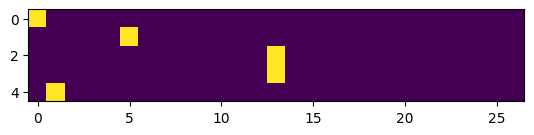

In [67]:
plt.imshow(xenc)
# you can check ([ 0,  5, 13, 13,  1])

* we always be careful about the data types because we dont wanna put integers value to neural network we want them as  a floating point
* we have a 5 examples

In [68]:
xenc.dtype


torch.int64

In [69]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=27).float() # we can fix like that
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

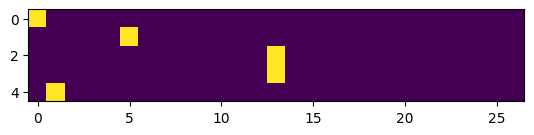

In [70]:
plt.imshow(xenc)

In [71]:
xenc.dtype

torch.float32

In [72]:
xenc.shape

torch.Size([5, 27])

In [73]:
W = torch.randn((27,1)) # random weight initialize for single neuron
xenc @ W 

tensor([[ 1.8572],
        [-1.5510],
        [-0.8740],
        [-0.8740],
        [-0.7451]])

* xenc is our input
* @ is a matrix multiplication
* xenc @ W ----> [5, 27] @ [27,1] = [5,1]
* we need a 27 neuron

In [74]:
W = torch.randn((27,27)) # random weight initialize for 27 neuron
xenc @ W 

tensor([[ 1.0381, -0.6479, -0.6408, -0.6009,  1.3718, -0.6289,  0.0302,  0.8369,
         -1.6956, -0.3792, -0.3142,  1.4133, -0.0094, -1.3599, -1.2331, -0.9313,
         -0.4772, -0.2031,  0.8330, -0.3247, -0.2423,  3.1447,  1.0244,  1.4327,
          1.2298,  1.8767,  0.2371],
        [-0.0181, -0.7747,  1.5582, -0.5198,  0.4671, -0.2768,  0.2540,  0.4130,
         -1.4375,  0.4443,  0.7069,  0.5917,  1.8006,  0.2173,  0.3662,  0.3359,
          0.5670,  0.7083, -1.0360,  0.9854,  0.8075, -1.8320,  1.7936,  0.2258,
         -0.7164,  0.8264, -0.6237],
        [ 2.4224,  0.3600,  0.5067, -1.6217, -1.6844,  1.2655, -2.2178, -1.0939,
         -2.3021,  1.6026, -1.3321, -0.5005, -0.4899,  0.0099,  1.3478, -1.3247,
         -0.4845, -2.2231, -0.7270,  0.2279, -1.3340,  0.3776,  0.7788, -0.9592,
          1.1730, -1.6723,  0.1523],
        [ 2.4224,  0.3600,  0.5067, -1.6217, -1.6844,  1.2655, -2.2178, -1.0939,
         -2.3021,  1.6026, -1.3321, -0.5005, -0.4899,  0.0099,  1.3478, -1.3247

* Previously, we had 27 inputs, and now we have 27 neurons in the hidden layer. We don't add an activation function or another layer; this is the simplest neural network, which is a single linear layer.


* In xenc @ 𝑊 we just have some negative and positive numbers, but we want those numbers to somehow represent the probabilities for the next character. Probabilities have a special structure: they are positive numbers and they sum to 1, which doesn't naturally come out of a neural network. Our 27 numbers give us log counts, so we must convert these numbers into the format we need.

In [75]:
(xenc @ W ).exp()

tensor([[ 2.8239,  0.5231,  0.5269,  0.5483,  3.9424,  0.5332,  1.0306,  2.3093,
          0.1835,  0.6844,  0.7304,  4.1093,  0.9906,  0.2567,  0.2914,  0.3940,
          0.6205,  0.8162,  2.3003,  0.7228,  0.7848, 23.2118,  2.7854,  4.1899,
          3.4206,  6.5318,  1.2676],
        [ 0.9820,  0.4608,  4.7502,  0.5946,  1.5953,  0.7582,  1.2892,  1.5113,
          0.2375,  1.5593,  2.0277,  1.8070,  6.0536,  1.2427,  1.4422,  1.3992,
          1.7630,  2.0306,  0.3549,  2.6788,  2.2423,  0.1601,  6.0111,  1.2533,
          0.4885,  2.2850,  0.5360],
        [11.2729,  1.4334,  1.6599,  0.1976,  0.1855,  3.5450,  0.1089,  0.3349,
          0.1000,  4.9662,  0.2639,  0.6062,  0.6127,  1.0100,  3.8490,  0.2659,
          0.6160,  0.1083,  0.4833,  1.2559,  0.2634,  1.4588,  2.1788,  0.3832,
          3.2316,  0.1878,  1.1645],
        [11.2729,  1.4334,  1.6599,  0.1976,  0.1855,  3.5450,  0.1089,  0.3349,
          0.1000,  4.9662,  0.2639,  0.6062,  0.6127,  1.0100,  3.8490,  0.2659

* Using the exp function, we can convert negative numbers to positive values while keeping positive numbers positive. However, we now have values less than 1, which isn't ideal for our log counts.

In [76]:
logits = (xenc @ W ) # log -counts
counts = logits.exp() # equivalent N
probs = counts / counts.sum(1, keepdims = True) # normalize counts value
probs

tensor([[0.0424, 0.0079, 0.0079, 0.0082, 0.0593, 0.0080, 0.0155, 0.0347, 0.0028,
         0.0103, 0.0110, 0.0618, 0.0149, 0.0039, 0.0044, 0.0059, 0.0093, 0.0123,
         0.0346, 0.0109, 0.0118, 0.3489, 0.0419, 0.0630, 0.0514, 0.0982, 0.0191],
        [0.0207, 0.0097, 0.1000, 0.0125, 0.0336, 0.0160, 0.0271, 0.0318, 0.0050,
         0.0328, 0.0427, 0.0380, 0.1274, 0.0262, 0.0304, 0.0294, 0.0371, 0.0427,
         0.0075, 0.0564, 0.0472, 0.0034, 0.1265, 0.0264, 0.0103, 0.0481, 0.0113],
        [0.2701, 0.0343, 0.0398, 0.0047, 0.0044, 0.0849, 0.0026, 0.0080, 0.0024,
         0.1190, 0.0063, 0.0145, 0.0147, 0.0242, 0.0922, 0.0064, 0.0148, 0.0026,
         0.0116, 0.0301, 0.0063, 0.0349, 0.0522, 0.0092, 0.0774, 0.0045, 0.0279],
        [0.2701, 0.0343, 0.0398, 0.0047, 0.0044, 0.0849, 0.0026, 0.0080, 0.0024,
         0.1190, 0.0063, 0.0145, 0.0147, 0.0242, 0.0922, 0.0064, 0.0148, 0.0026,
         0.0116, 0.0301, 0.0063, 0.0349, 0.0522, 0.0092, 0.0774, 0.0045, 0.0279],
        [0.0533, 0.0133,

* now every row here to 1
* by the way all this operations are differentiable 
* now time is adjust the w to find best probs 

* SUMMARY
* * 1-we have some inputs (xs) and some labes for the correct next charachter in the sequence (ys) and these are int
* * 2-and generating 27 neuron weights (w) and each neuron receives 27 inputs
* * 3-after that we have to encode all of the inputs with one hot 
* * 4-after then multiple this in the first layer of a neural net to get logits
* * 5-exponentiate the logits to get fake counts sort of 
* * 6-normalize these counts to get probs (!!! step 5-6 called softmax)
* * step 3-4-5-6 called forward pass

* backpropagation time...
* our operation was multiplication addition exponention sum. we know how can backpropagate through them because everything here is a differentiable

In [77]:
nlls = torch.zeros(5) # inputs coming from 'emma'
for i in range(5):
  # i-th bigram:
  x = xs[i].item() # input character index
  y = ys[i].item() # label character index
  print('--------')
  print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})')
  print('input to the neural net:', x)
  print('output probabilities from the neural net:', probs[i])
  print('label (actual next character):', y)
  p = probs[i, y]
  print('probability assigned by the net to the the correct character:', p.item())
  logp = torch.log(p)
  print('log likelihood:', logp.item())
  nll = -logp
  print('negative log likelihood:', nll.item())
  nlls[i] = nll

print('=========')
print('average negative log likelihood, i.e. loss =', nlls.mean().item())

--------
bigram example 1: .e (indexes 0,5)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0424, 0.0079, 0.0079, 0.0082, 0.0593, 0.0080, 0.0155, 0.0347, 0.0028,
        0.0103, 0.0110, 0.0618, 0.0149, 0.0039, 0.0044, 0.0059, 0.0093, 0.0123,
        0.0346, 0.0109, 0.0118, 0.3489, 0.0419, 0.0630, 0.0514, 0.0982, 0.0191])
label (actual next character): 5
probability assigned by the net to the the correct character: 0.008013753220438957
log likelihood: -4.826596260070801
negative log likelihood: 4.826596260070801
--------
bigram example 2: em (indexes 5,13)
input to the neural net: 5
output probabilities from the neural net: tensor([0.0207, 0.0097, 0.1000, 0.0125, 0.0336, 0.0160, 0.0271, 0.0318, 0.0050,
        0.0328, 0.0427, 0.0380, 0.1274, 0.0262, 0.0304, 0.0294, 0.0371, 0.0427,
        0.0075, 0.0564, 0.0472, 0.0034, 0.1265, 0.0264, 0.0103, 0.0481, 0.0113])
label (actual next character): 13
probability assigned by the net to the the correct character: 0

* Now we have a loss function and this loss is only made up differentiable operations we can minimize the loss by tuning w.
* so then we can tune minimize the loss and find a good setting of w

* OPTIMIZATION

In [78]:
xs

tensor([ 0,  5, 13, 13,  1])

In [79]:
ys

tensor([ 5, 13, 13,  1,  0])

In [80]:
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

In [81]:
# forward  pass
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
# btw: the last 2 lines here are together called a 'softmax'

In [82]:
probs.shape

torch.Size([5, 27])

In [83]:
probs[torch.arange(5), ys] # Possibility of outputs belonging to input

tensor([0.0123, 0.0181, 0.0267, 0.0737, 0.0150], grad_fn=<IndexBackward0>)

In [84]:
loss =- probs[torch.arange(5), ys].log().mean()
loss

tensor(3.7693, grad_fn=<NegBackward0>)

In [85]:
# backward pass
W.grad = None # set to 0
loss.backward()

* Actually before getting started we set grads to 0 in micgrograd but in pytorc setting None more efficient
* when we apply loss.backward() all inputs effect this and has a grad value

In [86]:
W.data += -0.1 * W.grad

* now put it all together

In [87]:
# create the dataset
xs, ys = [], []
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

number of examples:  228146


In [88]:
# gradient descent
for k in range(10):
  
  # forward pass
  xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
  logits = xenc @ W # predict log-counts
  counts = logits.exp() # counts, equivalent to N
  probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
  loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean()
  print(loss.item())
  
  # backward pass
  W.grad = None # set to zero the gradient
  loss.backward()
  
  # update
  W.data += -50 * W.grad

3.768618583679199
3.3788065910339355
3.161090850830078
3.027186155319214
2.9344840049743652
2.867231607437134
2.8166542053222656
2.777146339416504
2.7452542781829834
2.7188305854797363


* There are some differences between bigrams and neural networks:

* Bigrams do not scale well, while the strength of neural networks is their scalability.
* When you push the weights (W) towards zero in the loss function, the distribution becomes smoother and more even.
* Now, we should talk about regularization.

In [89]:
# Training cycles, using the entire dataset -> 200 Epochs
for k in range(200):
    
    # Forward pass
    xenc = F.one_hot(xs, num_classes=27).float() # one-hot encode the names
    logits = xenc @ W # logits, different word for log-counts
    counts = logits.exp() # 'fake counts', kinda like in  the N matrix of bigram
    probs = counts / counts.sum(1, keepdims=True) # Normal distribution probabilities (this is y_pred)
    loss = -probs[torch.arange(len(probs)), ys].log().mean() + 0.01 * (W**2).mean() # regularization loss
    print(f'Loss @ iteration {k+1}: {loss}')
    
    # Backward pass
    W.grad = None # Make sure all gradients are reset
    loss.backward() # Torch kept track of what this variable is, kinda cool
    
    # Weight update
    W.data += -50 * W.grad

Loss @ iteration 1: 2.696505308151245
Loss @ iteration 2: 2.6773722171783447
Loss @ iteration 3: 2.6608052253723145
Loss @ iteration 4: 2.6463515758514404
Loss @ iteration 5: 2.633664846420288
Loss @ iteration 6: 2.622471570968628
Loss @ iteration 7: 2.6125476360321045
Loss @ iteration 8: 2.6037068367004395
Loss @ iteration 9: 2.595794916152954
Loss @ iteration 10: 2.5886809825897217
Loss @ iteration 11: 2.5822560787200928
Loss @ iteration 12: 2.576429843902588
Loss @ iteration 13: 2.5711236000061035
Loss @ iteration 14: 2.566272735595703
Loss @ iteration 15: 2.5618228912353516
Loss @ iteration 16: 2.5577263832092285
Loss @ iteration 17: 2.5539441108703613
Loss @ iteration 18: 2.5504424571990967
Loss @ iteration 19: 2.5471925735473633
Loss @ iteration 20: 2.5441699028015137
Loss @ iteration 21: 2.5413525104522705
Loss @ iteration 22: 2.538721799850464
Loss @ iteration 23: 2.536262035369873
Loss @ iteration 24: 2.5339579582214355
Loss @ iteration 25: 2.5317976474761963
Loss @ iteration 

In [90]:
# Finally, sample from this neural network model
# (This structure is copied from the bigram approach)
g = torch.Generator().manual_seed(2147483642)

for i in range(5):
    out = []
    ix = 0
    while True:
        # ----------
        # BEFORE:
        #p = P[ix] # Bigram explicit probability approach
        # ----------
        # NOW:
        xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
        logits = xenc @ W # predict log-counts
        counts = logits.exp() # counts, equivalent to N
        p = counts / counts.sum(1, keepdims=True) # probabilities for next character
        # ----------
    
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        
        if ix == 0:
            break
    print(''.join(out))

ashan.
m.
asirrtai.
s.
naeryn.


# part 2

* * In this method (bigram), if we consider a single character at a time, there are 27 possible contexts. If we consider two characters, there are 27*27 possibilities. There are too many rows in this matrix with too few counts for each possibility, causing the method to become unmanageable and ineffective. Therefore, we will implement a Multilayer Perceptron (MLP) to predict the next character in the sequence. We will follow the approach outlined in this paper: [Bengio et al., 2003](https://www.jmlr.org/papers/volume3/bengio03a/bengio03a.pdf). While this paper uses a vocabulary of 17,000 words to build a word-level language model, we will use the same modeling approach for characters instead.
* * In this paper, a 17,000-word vocabulary is associated with a 30-dimensional feature vector for each word. This means each word is embedded in a 30-dimensional space, which is quite small for such a large vocabulary. Initially, these word embeddings are randomly distributed. However, as we tune these embeddings using backpropagation, some vectors will move closer together while others will move apart, reflecting their relationships and similarities. The paper uses a Multilayer Perceptron (MLP) to predict the next word based on previous words and trains the neural network by maximizing the log-likelihood.

In [91]:
from IPython import display
display.Image(url = 'https://production-media.paperswithcode.com/Screen_Shot_2020-05-26_at_2.17.37_PM.png')


* * In this diagram, we are using the previous three words to predict the next word (the fourth word) in the sequence. The lookup table is a matrix with 17,000 words, each represented by a 30-dimensional vector, converting each index to its corresponding embedding vector. We have an input layer of 30 neurons for each of the three words, totaling 90 values.

* * The size of the hidden layer is a hyperparameter, meaning it's a design choice left to the designer. We will experiment with various hidden layer sizes to evaluate their performance. For example, with 100 neurons in the hidden layer, each neuron would be fully connected to the 90 input values, using a tanh function as the activation function. The output layer consists of 17,000 neurons, one for each word in the vocabulary, and all are fully connected to the hidden layer neurons.

* * There is a significant competition between the hidden layer and the output layer due to the number of parameters. Our parameters include the weights and biases of both the output and hidden layers, as well as the embedding lookup table. All these parameters will be tuned during backpropagation.

* * Let's implement this setup...

In [92]:
import torch 
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [93]:
# read in all the words
words = open('names.txt','r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [94]:
len(words)

32033

In [95]:
# build the vocabulary of characters and mappings to/from integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [96]:
# build the dataset
block_size = 3 # context length: how many characters do we take to predict the next one?
# to guess the letter after the 3rd letter

X, Y = [], []
for w in words[:5]:

    print(w)
    context = [0] * block_size
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        print(''.join(itos[i] for i in context), '--->', itos[ix])
        context = context[1:] + [ix] # crop and append

X = torch.tensor(X)
Y = torch.tensor(Y)

emma
... ---> e
..e ---> m
.em ---> m
emm ---> a
mma ---> .
olivia
... ---> o
..o ---> l
.ol ---> i
oli ---> v
liv ---> i
ivi ---> a
via ---> .
ava
... ---> a
..a ---> v
.av ---> a
ava ---> .
isabella
... ---> i
..i ---> s
.is ---> a
isa ---> b
sab ---> e
abe ---> l
bel ---> l
ell ---> a
lla ---> .
sophia
... ---> s
..s ---> o
.so ---> p
sop ---> h
oph ---> i
phi ---> a
hia ---> .


* finally dataset now looks like

In [97]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([32, 3]), torch.int64, torch.Size([32]), torch.int64)

In [98]:
X

tensor([[ 0,  0,  0],
        [ 0,  0,  5],
        [ 0,  5, 13],
        [ 5, 13, 13],
        [13, 13,  1],
        [ 0,  0,  0],
        [ 0,  0, 15],
        [ 0, 15, 12],
        [15, 12,  9],
        [12,  9, 22],
        [ 9, 22,  9],
        [22,  9,  1],
        [ 0,  0,  0],
        [ 0,  0,  1],
        [ 0,  1, 22],
        [ 1, 22,  1],
        [ 0,  0,  0],
        [ 0,  0,  9],
        [ 0,  9, 19],
        [ 9, 19,  1],
        [19,  1,  2],
        [ 1,  2,  5],
        [ 2,  5, 12],
        [ 5, 12, 12],
        [12, 12,  1],
        [ 0,  0,  0],
        [ 0,  0, 19],
        [ 0, 19, 15],
        [19, 15, 16],
        [15, 16,  8],
        [16,  8,  9],
        [ 8,  9,  1]])

In [99]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

* lets build the embedding lookup table C
* We have 27 characters, and we will embed them in a lower-dimensional space. In the paper, they have 17,000 words embedded in a 30-dimensional space. Since we only have 27 possible characters, let's start by embedding them in a space as small as 2 dimensions.

In [100]:
C = torch.randn((27,2))
C

tensor([[ 0.1872, -0.5869],
        [ 1.1833, -0.7402],
        [ 1.4423, -0.8875],
        [ 0.5585, -0.3955],
        [ 1.5299,  0.2739],
        [ 1.0017,  0.9296],
        [ 0.0347,  0.7343],
        [-1.5197,  0.5268],
        [ 1.4896, -0.2624],
        [ 1.4727,  0.9189],
        [ 0.6766, -0.2194],
        [ 0.6771, -0.4898],
        [ 1.1276, -1.9946],
        [ 0.2028,  1.6505],
        [-0.7974, -0.3149],
        [ 1.0752,  0.9215],
        [-0.1935, -0.2977],
        [-3.0346,  0.3157],
        [ 0.0352,  1.2213],
        [ 0.6060, -0.7426],
        [-1.1486, -0.2547],
        [-1.1897, -0.2145],
        [-1.0514,  1.0110],
        [ 2.3559, -1.2650],
        [ 0.6257,  0.2159],
        [-2.4725,  0.7584],
        [ 0.5958,  1.3541]])

There are two different ways to handle the embedding process. The first method is to provide direct input to the C lookup table. The second method is to convert the input number to one-hot encoding and then input it to C. We will use the first method because it is faster.

For example, if our input is 5...

In [101]:
# 1st way
C[5]

tensor([1.0017, 0.9296])

In [102]:
# 2nd way
F.one_hot(torch.tensor(5), num_classes=27).float() @ C # num_classes is 27 because we have a 27 char

tensor([1.0017, 0.9296])

In [103]:
C[[5,6,7]] # we can use like that pytorch idnexing is very flexible

tensor([[ 1.0017,  0.9296],
        [ 0.0347,  0.7343],
        [-1.5197,  0.5268]])

In [104]:
C[torch.tensor([5,6,7])]

tensor([[ 1.0017,  0.9296],
        [ 0.0347,  0.7343],
        [-1.5197,  0.5268]])

In [105]:
C[X].shape

torch.Size([32, 3, 2])

In [106]:
X[13,2] # index 13th second dimension value is 1

tensor(1)

In [107]:
C[1] == C[X[13,2]] # the equivalent of this value in the lookup table. you can verify manually in X

tensor([True, True])

In [108]:
emb = C[X]
emb.shape

torch.Size([32, 3, 2])

In [109]:
W1 = torch.randn((6,100)) # we have a 2 dimnesional embeddings and have a three of them so 2x3=6, number of layer depends our choice which is 100
b1 = torch.randn(100) # bias also randomly

In [110]:
emb @ W1 + b1

RuntimeError: mat1 and mat2 shapes cannot be multiplied (96x2 and 6x100)

* there was a error because we have to change shapes

In [111]:
emb.shape 

torch.Size([32, 3, 2])

* we need to convert 3d embedding to 2d, one way to do this

In [112]:
torch.cat([emb[:,0,:], emb[:,1,:] , emb[:,2,:]],1) # 1 is cor dimension ???

tensor([[ 0.1872, -0.5869,  0.1872, -0.5869,  0.1872, -0.5869],
        [ 0.1872, -0.5869,  0.1872, -0.5869,  1.0017,  0.9296],
        [ 0.1872, -0.5869,  1.0017,  0.9296,  0.2028,  1.6505],
        [ 1.0017,  0.9296,  0.2028,  1.6505,  0.2028,  1.6505],
        [ 0.2028,  1.6505,  0.2028,  1.6505,  1.1833, -0.7402],
        [ 0.1872, -0.5869,  0.1872, -0.5869,  0.1872, -0.5869],
        [ 0.1872, -0.5869,  0.1872, -0.5869,  1.0752,  0.9215],
        [ 0.1872, -0.5869,  1.0752,  0.9215,  1.1276, -1.9946],
        [ 1.0752,  0.9215,  1.1276, -1.9946,  1.4727,  0.9189],
        [ 1.1276, -1.9946,  1.4727,  0.9189, -1.0514,  1.0110],
        [ 1.4727,  0.9189, -1.0514,  1.0110,  1.4727,  0.9189],
        [-1.0514,  1.0110,  1.4727,  0.9189,  1.1833, -0.7402],
        [ 0.1872, -0.5869,  0.1872, -0.5869,  0.1872, -0.5869],
        [ 0.1872, -0.5869,  0.1872, -0.5869,  1.1833, -0.7402],
        [ 0.1872, -0.5869,  1.1833, -0.7402, -1.0514,  1.0110],
        [ 1.1833, -0.7402, -1.0514,  1.0

* we have a problem. This code not generalize when we change the block_size this code will blow up
* there is a more efficient and dynamic way to do this(.view())

In [113]:
torch.cat(torch.unbind(emb,1),1).shape # does not depend to block_size

torch.Size([32, 6])

* how can we fix tensor view?

In [131]:
a = torch.arange(18)
print(f'a: {a}\n')
print(f'a.shape: {a.shape}\n',)
print(f'a.view(2,9): {a.view(2,9)} \n',)
print(f'a.view(3,2,3): {a.view(3,2,3)}\n',)

a: tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

a.shape: torch.Size([18])

a.view(2,9): tensor([[ 0,  1,  2,  3,  4,  5,  6,  7,  8],
        [ 9, 10, 11, 12, 13, 14, 15, 16, 17]]) 

a.view(3,2,3): tensor([[[ 0,  1,  2],
         [ 3,  4,  5]],

        [[ 6,  7,  8],
         [ 9, 10, 11]],

        [[12, 13, 14],
         [15, 16, 17]]])



* The view() function is very powerful. It lets us reshape the tensor in any way, as long as the total number of elements stays the same.
* The view so efficient for us because every tensor represented in the computer a.storage and its always one dimensional vector but when we called .view we just manipulated some attributies of that tensor. one dimnesional sequence is interpreted to be n dimensional tensor. in this part no memory is being changed or copied or moved
* look here for more: http://blog.ezyang.com/2019/05/pytorch-internals/

In [134]:
a.storage()

 0
 1
 2
 3
 4
 5
 6
 7
 8
 9
 10
 11
 12
 13
 14
 15
 16
 17
[torch.LongStorage of size 18]

In [138]:
print(emb.shape)
print(emb.view(32,6))

torch.Size([32, 3, 2])
tensor([[ 0.1872, -0.5869,  0.1872, -0.5869,  0.1872, -0.5869],
        [ 0.1872, -0.5869,  0.1872, -0.5869,  1.0017,  0.9296],
        [ 0.1872, -0.5869,  1.0017,  0.9296,  0.2028,  1.6505],
        [ 1.0017,  0.9296,  0.2028,  1.6505,  0.2028,  1.6505],
        [ 0.2028,  1.6505,  0.2028,  1.6505,  1.1833, -0.7402],
        [ 0.1872, -0.5869,  0.1872, -0.5869,  0.1872, -0.5869],
        [ 0.1872, -0.5869,  0.1872, -0.5869,  1.0752,  0.9215],
        [ 0.1872, -0.5869,  1.0752,  0.9215,  1.1276, -1.9946],
        [ 1.0752,  0.9215,  1.1276, -1.9946,  1.4727,  0.9189],
        [ 1.1276, -1.9946,  1.4727,  0.9189, -1.0514,  1.0110],
        [ 1.4727,  0.9189, -1.0514,  1.0110,  1.4727,  0.9189],
        [-1.0514,  1.0110,  1.4727,  0.9189,  1.1833, -0.7402],
        [ 0.1872, -0.5869,  0.1872, -0.5869,  0.1872, -0.5869],
        [ 0.1872, -0.5869,  0.1872, -0.5869,  1.1833, -0.7402],
        [ 0.1872, -0.5869,  1.1833, -0.7402, -1.0514,  1.0110],
        [ 1.1833,

* 
In other words, in order to use the tensor in the size we want, we will use .view() and define the hidden layer again.

In [140]:
h = emb.view(32,6) @ W1 +b1

In [141]:
h.shape

torch.Size([32, 100])

In [ ]:
# Let's make this definition dynamic
h = emb.view(-1,6) @ W1 +b1

* PyTorch reads the -1 and infers the correct dimension based on the other dimensions provided. For example, if (2x3) is already used, and you have 32 times 6 (or inputs times 6), PyTorch will determine the appropriate shape.

In [142]:
h = torch.tanh(emb.view(-1,6) @ W1 +b1)

* Due to the tanh function, our numbers are constrained to values between -1 and 1. The shape is 32 by 100,  which represents the hidden layer activations for each of our 32 examples.


In [145]:
print(h.shape)
print(b1.shape)

torch.Size([32, 100])
torch.Size([100])


* There's one more thing we need to be very careful with: broadcasting. In particular, we need to ensure that broadcasting behaves as expected. The shape of this tensor is 32 by 100, and the shape of the ones tensor is 100.
* We see that the addition will broadcast these two tensors, with the 32 by 100 tensor broadcasting to match the 100-dimensional tensor.
* 32,100 ---> 1,100 Broadcasting will align on the right, creating a fake dimension. This will turn the 100-dimensional tensor into a 1 by 100 row vector, which will then be vertically copied for each of the 32 rows, allowing for element-wise addition.
* In this case, the correct operation will occur because the same bias vector is added to all the rows of the matrix, which is what we want. It's always good practice to ensure this behavior.

In [148]:
W2 = torch.randn((100, 27)) # 100 inputs, 27 output neurons
b2 = torch.randn(27)

* Finally, let's create the final layer. We'll define w2 and b2, where the input size is 100 and the output size will be 27, corresponding to the 27 possible characters.

In [149]:
logits = h @ W2 +b2

In [155]:
# Softmax transforms outputs into probabilities
counts = logits.exp()
prob = counts / counts.sum(1, keepdim=True)
print(prob.shape)
print(prob[0].sum())

torch.Size([32, 27])
tensor(1.0000)


In [156]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

* Now, similar to the previous video, we want to index into the rows of the probability matrix and, in each row, extract the probability assigned to the correct character as indicated.

In [158]:
prob[torch.arange(32), Y]

tensor([1.1373e-13, 2.1287e-10, 8.0343e-07, 3.0947e-11, 1.8342e-08, 1.4854e-10,
        9.8558e-11, 8.6560e-01, 1.6836e-04, 1.7264e-11, 5.9641e-12, 6.4464e-08,
        9.9895e-05, 1.4414e-01, 2.6857e-03, 2.5700e-14, 1.1104e-01, 1.0620e-10,
        8.2174e-10, 1.2385e-10, 5.1654e-10, 1.9204e-09, 1.4492e-12, 8.7409e-06,
        1.4051e-09, 1.8435e-08, 1.6184e-12, 1.9719e-09, 8.5400e-01, 2.2848e-02,
        2.5863e-01, 2.8834e-09])

* This provides the current probabilities assigned by the neural network, based on its weight settings, to the correct character in the sequence.
* You can see that the probabilities look reasonable for some characters (like this one, which is around 0.2), but they don't look very good for many other characters.
* The network currently considers some characters extremely unlikely. However, since we haven't trained the neural network yet, this will improve. Ideally, all these probabilities should be 1, indicating that we are correctly predicting the next character.

In [166]:
# We want the average log probability across all 32 inputs to be our loss
loss = -prob[torch.arange(32), Y].log().mean()
print(loss.item()) # This is to be minimized

16.80527687072754


* The following is a simplified version of the code provided above:








In [162]:
X.shape, Y.shape # dataset

(torch.Size([32, 3]), torch.Size([32]))

In [163]:
# Let's re-initialize the weights and biases
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27,2), generator=g)        # 27 characters, has2 dimensions each
W1 = torch.randn((6,100), generator=g)      # 3 characters, each with 2 embedding values, are used as inputs to 100 neurons.
b1 = torch.randn((100), generator=g)        # 100 biases added to the 100 neuron outputs
W2 = torch.randn((100,27), generator=g)     # 100 neuron outputs as inputs to 27 output neurons
b2 = torch.randn((27), generator=g)         # 27 biases added to the 27 output neurons

parameters = [C, W1, b1, W2, b2]            # Group all parameters into a single structure.

In [165]:
sum(p.nelement() for p in parameters) # number of parameters in total

3481

In [168]:
emb = C[X] # (32,3,2)
h = torch.tanh(emb.view(-1,6) @ W1 +b1) # (32,100)
logits = h @ W2 + b2 # (32,27)
# counts = logits.exp()
# prob = counts / counts.sum(1, keepdim=True)
# loss = -prob[torch.arange(32), Y].log().mean()
loss=F.cross_entropy(logits, Y)
loss

tensor(17.7697)

* this is just classification. Many people use classification, which is why PyTorch provides the functional.cross_entropy function to compute this more efficiently. We can simply call f.cross_entropy, passing in the logits and the target array y, and it will calculate the same loss. In fact, we can replace the custom implementation with this function and achieve the same result.
* There are several good reasons to prefer f.cross_entropy over a custom implementation. Firstly, using f.cross_entropy prevents PyTorch from creating numerous intermediate tensors, which can be inefficient. Instead, PyTorch optimizes operations, often using fused kernels that evaluate expressions more efficiently. Secondly, the backward pass is more efficient with f.cross_entropy, not just because of fused kernels but also due to its simpler analytical and mathematical implementation.
 * Secondly, f.cross_entropy is often more numerically stable. For example, consider logits of -2, 3, -3, 0, and 5. When we take the exponent of these logits and normalize them to sum to 1, it shows how f.cross_entropy handles numerical stability effectively.